In [69]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [70]:
# Load Dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [71]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [74]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [75]:
df_train.shape

(1460, 81)

Analysis of the Housing Prices Training Data

In [76]:
df_train.SalePrice.value_counts()

SalePrice
140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: count, Length: 663, dtype: int64

In [77]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


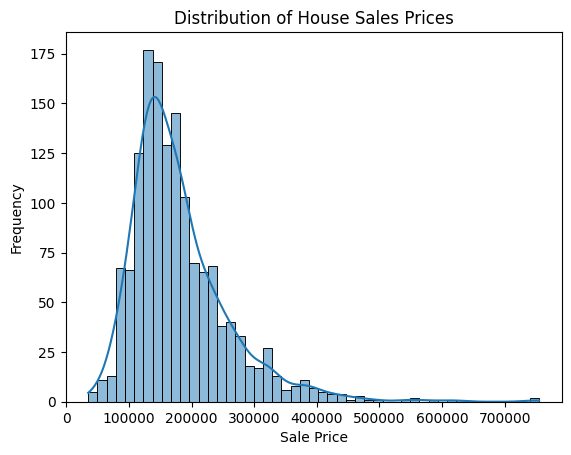

In [78]:
sns.histplot(df_train['SalePrice'], kde=True)
plt.title('Distribution of House Sales Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

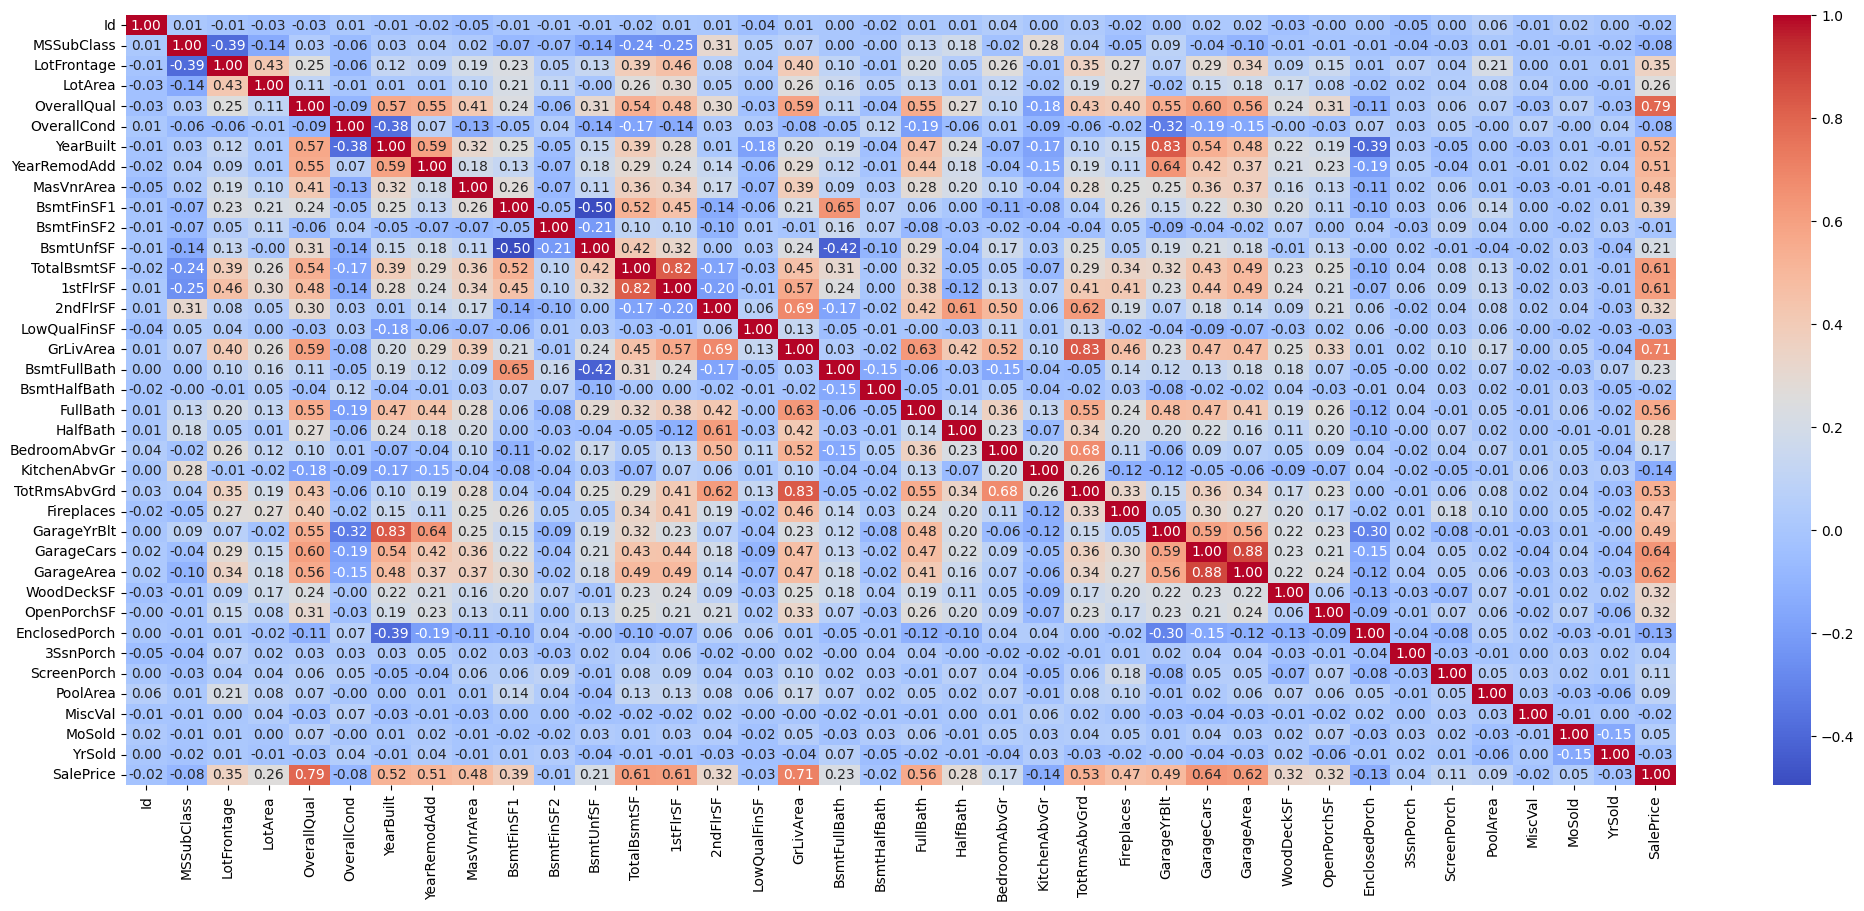

In [79]:
# Heatmap for correlations
numeric_data = df_train.select_dtypes(['int', 'float'])
plt.figure(figsize=(25, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Identification of Strong Correlations:
Strong positive correlations (close to 1):

OverallQual (General quality of material and finish) with SalePrice (Selling price) has a correlation of 0.79, indicating that the higher the quality, the higher the selling price.

GrLivArea (Total Floor Area Above Ground) with SalePrice has a correlation of 0.71, showing that larger living areas generally lead to higher selling prices.

GarageCars (Garage capacity in terms of cars) and GarageArea (Garage area) with SalePrice have correlations of 0.64 and 0.62 respectively, indicating that larger garages with greater capacity increase property value.

TotalBsmtSF (Total Basement Area) with SalePrice has a correlation of 0.61, suggesting that larger basements also contribute to a higher sales price.

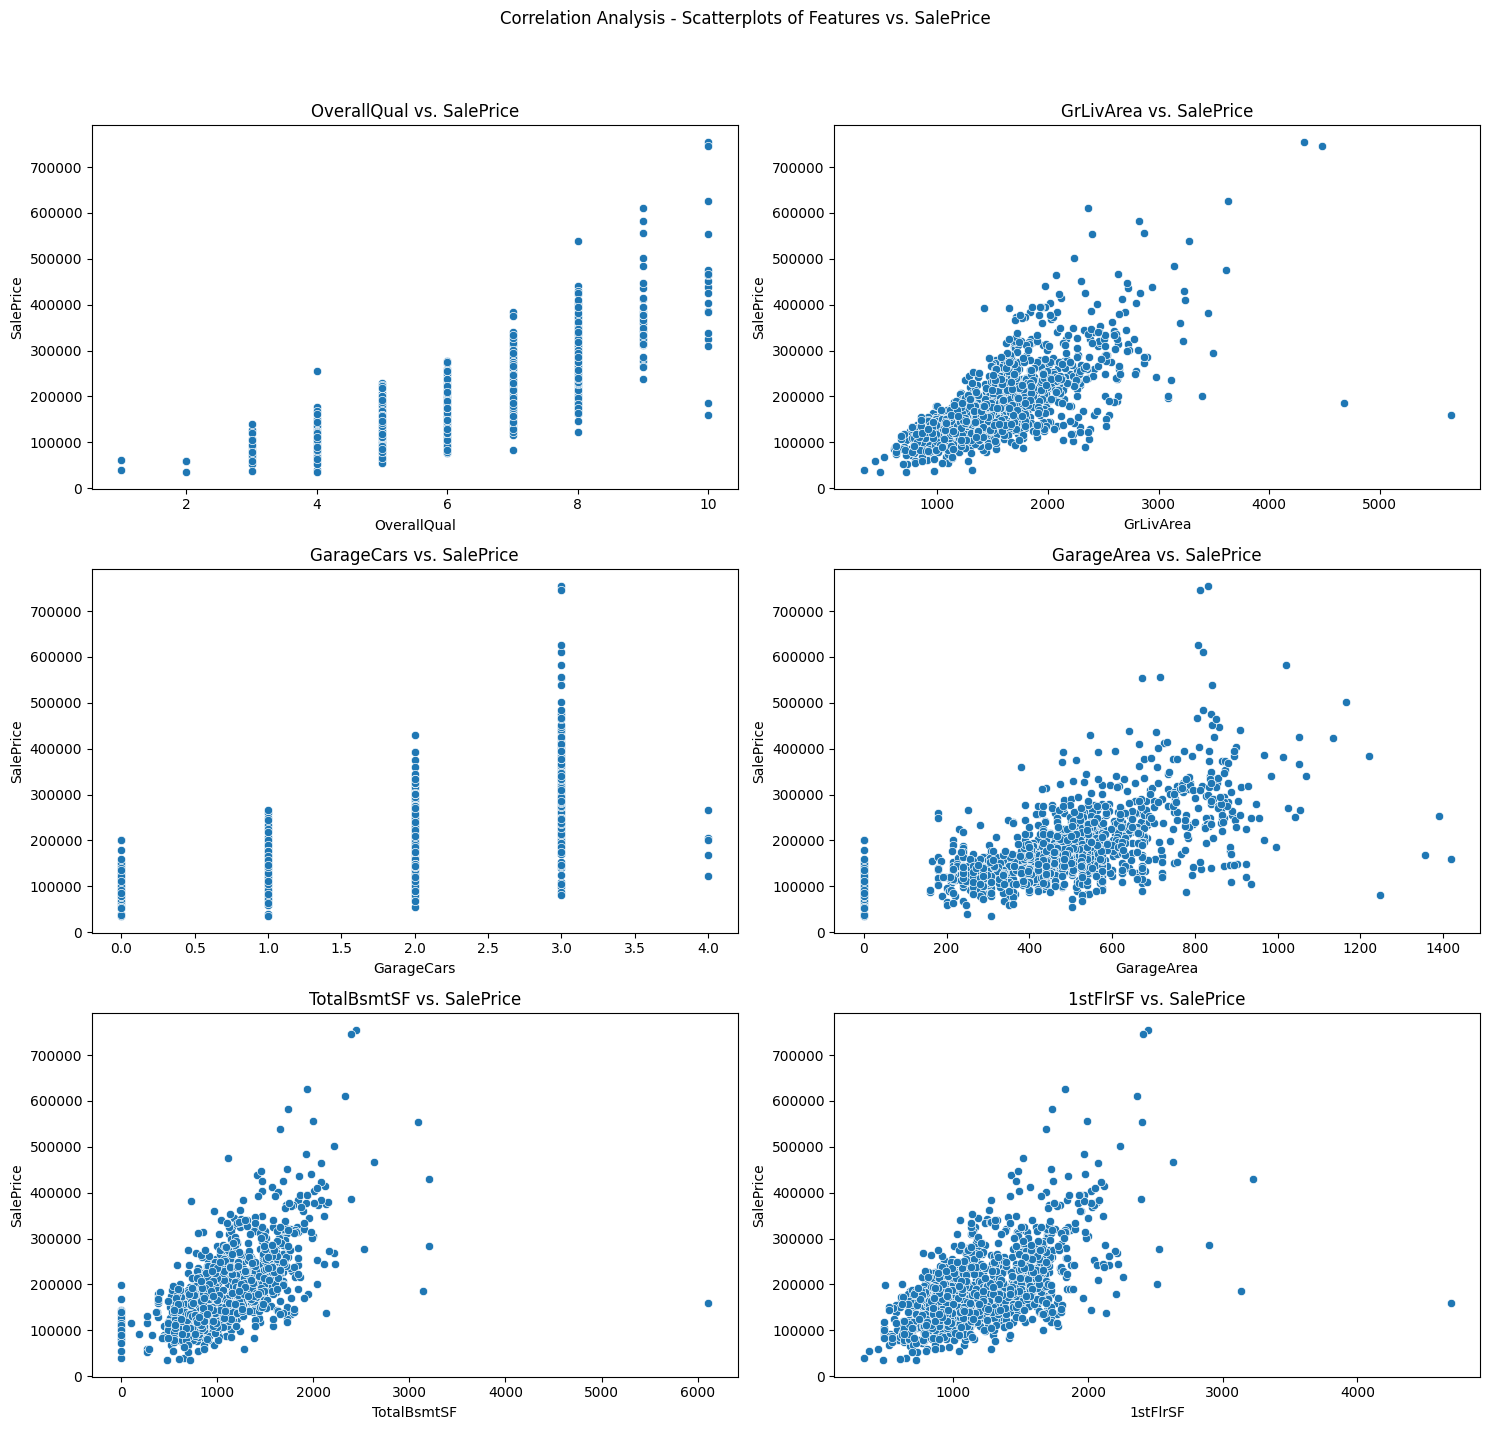

In [80]:
# Plotting the features to compare with SalesPrice
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Correlation Analysis - Scatterplots of Features vs. SalePrice')

sns.scatterplot(ax=axes[0, 0], x='OverallQual', y='SalePrice', data=df_train)
axes[0, 0].set_title('OverallQual vs. SalePrice')

sns.scatterplot(ax=axes[0, 1], x='GrLivArea', y='SalePrice', data=df_train)
axes[0, 1].set_title('GrLivArea vs. SalePrice')

sns.scatterplot(ax=axes[1, 0], x='GarageCars', y='SalePrice', data=df_train)
axes[1, 0].set_title('GarageCars vs. SalePrice')

sns.scatterplot(ax=axes[1, 1], x='GarageArea', y='SalePrice', data=df_train)
axes[1, 1].set_title('GarageArea vs. SalePrice')

sns.scatterplot(ax=axes[2, 0], x='TotalBsmtSF', y='SalePrice', data=df_train)
axes[2, 0].set_title('TotalBsmtSF vs. SalePrice')

sns.scatterplot(ax=axes[2, 1], x='1stFlrSF', y='SalePrice', data=df_train)
axes[2, 1].set_title('1stFlrSF vs. SalePrice')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

This graph had a positive correlation.

OverallQual vs. SalePrice: The overall quality of materials and workmanship is positively correlated with sale price.

GrLivArea vs. SalePrice: Above-ground living area also shows a positive correlation, indicating that homes with more living space tend to have higher prices.

GarageCars vs. SalePrice: The number of cars the garage can accommodate shows a positive correlation with the sale price.

GarageArea vs. SalePrice: Garage area has a positive relationship with sale price.

TotalBsmtSF vs. SalePrice: Total basement area is also positively correlated with sales price.

1stFlrSF vs. SalePrice: First floor area has a positive correlation with sales price.

/var/folders/dq/qk8zdkks74s233j5sqv_tsb40000gn/T/ipykernel_91536/1837941402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_train, x='Neighborhood', y='SalePrice', errorbar=None, palette='Set2', estimator=np.mean,


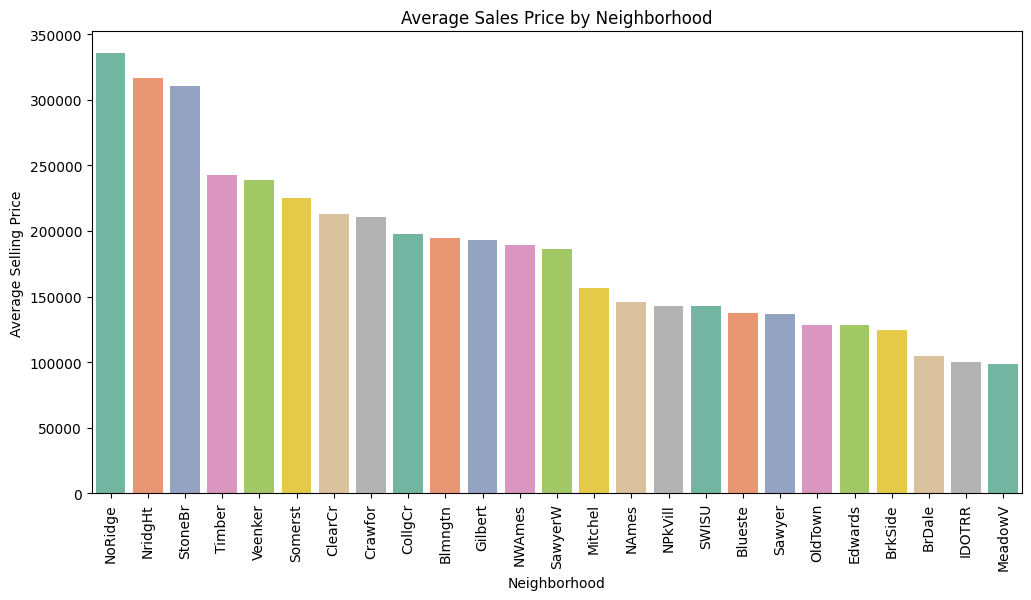

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_train, x='Neighborhood', y='SalePrice', errorbar=None, palette='Set2', estimator=np.mean, 
            order=df_train.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).index)
plt.title('Average Sales Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

/var/folders/dq/qk8zdkks74s233j5sqv_tsb40000gn/T/ipykernel_91536/1040853398.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_train, x='YearBuilt', y='SalePrice', palette='Set2', estimator=np.median)


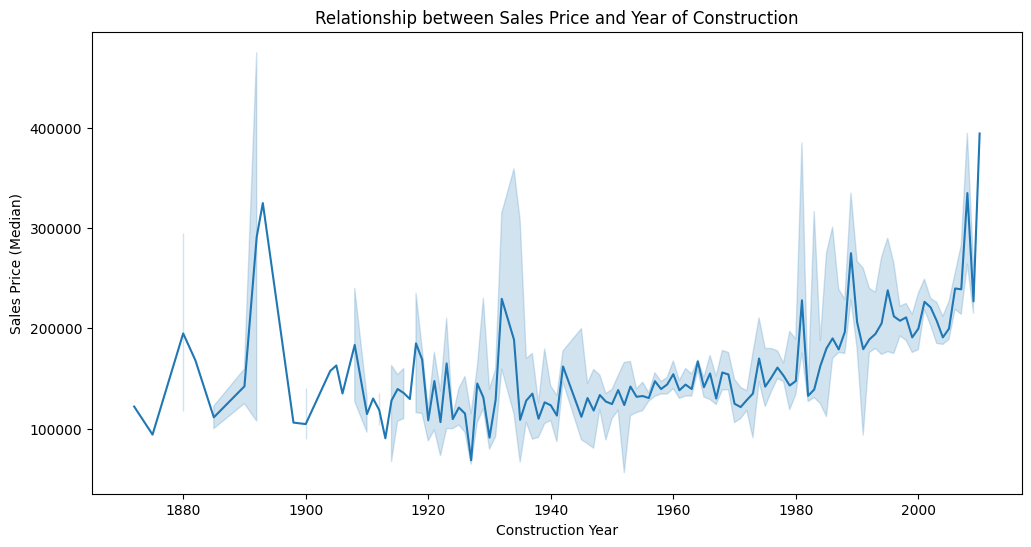

In [82]:
# estimator=np.median: For each construction year, the plot displays the median sale price. 
# Using the median is beneficial as it reduces the impact of outliers compared to the mean.

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_train, x='YearBuilt', y='SalePrice', palette='Set2', estimator=np.median)
plt.title('Relationship between Sales Price and Year of Construction')
plt.xlabel('Construction Year')
plt.ylabel('Sales Price (Median)')
plt.grid(False)
plt.show()

The Increasing Trend of the Line Plot: Indicates that newer houses tend to have higher median sale prices. This could be due to factors like inflation, modern amenities, or increased demand for newer properties.

Handling The Missing Data

In [83]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [84]:
cols_with_null = df_train.isnull().sum().sort_values(ascending=False)
cols_with_null.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [85]:
print("Total number of missing data in the dataset: ", df_train.isnull().sum().sum())

Total number of missing data in the dataset:  7829


In [86]:
df_train["SalePrice"].isnull().sum()

np.int64(0)

In [87]:
# Removing the first six columns with the most missing data with the drop method.
cols_to_drop = (cols_with_null.head(6).index).tolist()
df_train.drop(cols_to_drop, axis=1, inplace=True)
df_test.drop(cols_to_drop, axis=1, inplace=True)

Splitting the dataset

In [88]:
X = df_train.drop(['SalePrice'], axis=1)
Y = df_train['SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Handling the Categorical and Numerical Columns

In [89]:
# Keeping all categorical columns with less that 10 unique values
categorical_cols = [cname for cname in X_train.columns 
                  if X_train[cname].nunique()<10 and X_train[cname].dtype == "object"]

In [90]:
# Keeping only those numerical columns of type integer and float
numerical_cols = [cname for cname in X_train.columns 
                if X_train[cname].dtype in ["int", "float"]]

In [91]:
print("The number of categorical columns: ", len(categorical_cols))
print("The number of numerical columns: ", len(numerical_cols))

The number of categorical columns:  34
The number of numerical columns:  37


In [92]:
# Selected 71 (34+37) columns. Removing any other columns not selected from the dataset
total_cols = categorical_cols + numerical_cols

X_train = X_train[total_cols]
X_test = X_test[total_cols]

Pipelines for data preprocessing

In [93]:
# Pipeline for numerical columns to handle missing data and scale data
numerical_transformer = Pipeline(steps=[
    ("imputer_num", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [94]:
# Pipeline for categorical columns to handle missing data and perform one-hot encoding
categorical_transformer = Pipeline(steps=[
    ("imputer_cal", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [95]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

Lasso Regression

In [96]:
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.01))
])

print("\nLasso Regression:")
lasso_pipeline.fit(X_train, Y_train)



Lasso Regression:


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+11, tolerance: 7.191e+08
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF'...
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', 'GarageType',
                                                   'GarageFinish', 'GarageQual', ...])])),
                ('model', Lasso(alpha=0.01))])

In [97]:
# Train and test predictions
Y_pred_train_lasso = lasso_pipeline.predict(X_train)
Y_pred_test_lasso = lasso_pipeline.predict(X_test)

In [98]:
# Training Data Evaluation for Lasso
print("Training Data Evaluation:")
print(f'MAE: {mean_absolute_error(Y_train, Y_pred_train_lasso):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_train, Y_pred_train_lasso)):.2f}')
print(f'R²: {r2_score(Y_train, Y_pred_train_lasso):.2f}')

# Test Data Evaluation for Lasso
print("\nTest Data Evaluation:")
print(f'MAE: {mean_absolute_error(Y_test, Y_pred_test_lasso):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, Y_pred_test_lasso)):.2f}')
print(f'R²: {r2_score(Y_test, Y_pred_test_lasso):.2f}')


Training Data Evaluation:
MAE: 14103.95
RMSE: 20784.40
R²: 0.93

Test Data Evaluation:
MAE: 23533.07
RMSE: 58652.79
R²: 0.50


In [99]:
# Cross-validation for Lasso
cv_scores_lasso = cross_val_score(lasso_pipeline, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_lasso = np.sqrt(-cv_scores_lasso)
print(f'\nCross-Validated RMSE for Lasso: {cv_rmse_lasso.mean():.2f}')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.170e+10, tolerance: 5.798e+08
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.659e+10, tolerance: 5.678e+08
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter


Cross-Validated RMSE for Lasso: 28937.87


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.411e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


Ridge Regression

In [100]:
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

print("\nRidge Regression:")
ridge_pipeline.fit(X_train, Y_train)



Ridge Regression:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF'...
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', 'GarageType',
                                                   'GarageFinish', 'GarageQual', ...])])),
                ('model', Ridge())])

In [101]:
# Train and test predictions
Y_pred_train_ridge = ridge_pipeline.predict(X_train)
Y_pred_test_ridge = ridge_pipeline.predict(X_test)


In [102]:
# Training Data Evaluation for Ridge
print("Training Data Evaluation:")
print(f'MAE: {mean_absolute_error(Y_train, Y_pred_train_ridge):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_train, Y_pred_train_ridge)):.2f}')
print(f'R²: {r2_score(Y_train, Y_pred_train_ridge):.2f}')

# Test Data Evaluation for Ridge
print("\nTest Data Evaluation:")
print(f'MAE: {mean_absolute_error(Y_test, Y_pred_test_ridge):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, Y_pred_test_ridge)):.2f}')
print(f'R²: {r2_score(Y_test, Y_pred_test_ridge):.2f}')

Training Data Evaluation:
MAE: 14532.63
RMSE: 21861.45
R²: 0.92

Test Data Evaluation:
MAE: 22427.40
RMSE: 52035.67
R²: 0.61


In [103]:
# Cross-validation for Ridge
cv_scores_ridge = cross_val_score(ridge_pipeline, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_ridge = np.sqrt(-cv_scores_ridge)
print(f'\nCross-Validated RMSE for Ridge: {cv_rmse_ridge.mean():.2f}')


Cross-Validated RMSE for Ridge: 28025.92


Decision Tree Regression

In [104]:
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=5))
])

print("\nDecision Tree Regression:")
dt_pipeline.fit(X_train, Y_train)



Decision Tree Regression:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF'...
                                                   'LandSlope', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', 'GarageType',
                                                   'GarageFinish', 'GarageQual', ...])])),
                ('model', DecisionTreeRegressor(max_depth=5))])

In [105]:
# Train and test predictions
Y_pred_train_dt = dt_pipeline.predict(X_train)
Y_pred_test_dt = dt_pipeline.predict(X_test)

In [106]:
# Training Data Evaluation for Decision Tree
print("Training Data Evaluation:")
print(f'MAE: {mean_absolute_error(Y_train, Y_pred_train_dt):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_train, Y_pred_train_dt)):.2f}')
print(f'R²: {r2_score(Y_train, Y_pred_train_dt):.2f}')

# Test Data Evaluation for Decision Tree
print("\nTest Data Evaluation:")
print(f'MAE: {mean_absolute_error(Y_test, Y_pred_test_dt):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, Y_pred_test_dt)):.2f}')
print(f'R²: {r2_score(Y_test, Y_pred_test_dt):.2f}')

Training Data Evaluation:
MAE: 21401.57
RMSE: 28824.20
R²: 0.87

Test Data Evaluation:
MAE: 26768.44
RMSE: 43853.77
R²: 0.72


In [107]:
# Cross-validation for Decision Tree
cv_scores_dt = cross_val_score(dt_pipeline, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_dt = np.sqrt(-cv_scores_dt)
print(f'\nCross-Validated RMSE for Decision Tree: {cv_rmse_dt.mean():.2f}')


Cross-Validated RMSE for Decision Tree: 40256.09


Random Forest Regression

In [108]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=0))
])

print("\nRandom Forest Regression:")
rf_pipeline.fit(X_train, Y_train)


Random Forest Regression:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF'...
                                                   'LandSlope', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', 'GarageType',
                                                   'GarageFinish', 'GarageQual', ...])])),
                ('model', RandomForestRegressor(random_state=0))])

In [109]:
# Train and test predictions
Y_pred_train_rf = rf_pipeline.predict(X_train)
Y_pred_test_rf = rf_pipeline.predict(X_test)

In [110]:
# Training Data Evaluation for Random Forest
print("Training Data Evaluation:")
print(f'MAE: {mean_absolute_error(Y_train, Y_pred_train_rf):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_train, Y_pred_train_rf)):.2f}')
print(f'R²: {r2_score(Y_train, Y_pred_train_rf):.2f}')

# Test Data Evaluation for Random Forest
print("\nTest Data Evaluation:")
print(f'MAE: {mean_absolute_error(Y_test, Y_pred_test_rf):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, Y_pred_test_rf)):.2f}')
print(f'R²: {r2_score(Y_test, Y_pred_test_rf):.2f}')

Training Data Evaluation:
MAE: 6510.20
RMSE: 10896.34
R²: 0.98

Test Data Evaluation:
MAE: 17847.67
RMSE: 34066.44
R²: 0.83


In [111]:
# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_pipeline, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_rf = np.sqrt(-cv_scores_rf)
print(f'\nCross-Validated RMSE for Random Forest: {cv_rmse_rf.mean():.2f}')


Cross-Validated RMSE for Random Forest: 29432.29


Hyperparameter Tuning for Random Forest

In [112]:
rfh_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,          # Increase number of trees
        max_depth=10,              # Limit the depth of the tree
        min_samples_split=10,      # Minimum number of samples required to split a node
        min_samples_leaf=4,        # Minimum number of samples required at a leaf node
        max_features='sqrt',       # Use a subset of features to reduce variance
        random_state=0,
        n_jobs=-1                  # Use all available cores for faster computation
    ))
])

print("\nRandom Forest Regression:")
rfh_pipeline.fit(X_train, Y_train)


Random Forest Regression:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF'...
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', 'GarageType',
                                                   'GarageFinish', 'GarageQual', ...])])),
                ('model',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       min_samples_leaf=4, min_samples_split=10,
                                       n_estimators=200, n_jobs=-1,
                                       random_state=0))])

In [113]:
# Train and test predictions
Y_pred_train_rfh = rf_pipeline.predict(X_train)
Y_pred_test_rfh = rf_pipeline.predict(X_test)

In [114]:
# Training Data Evaluation for Random Forest
print("Training Data Evaluation:")
print(f'MAE: {mean_absolute_error(Y_train, Y_pred_train_rfh):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_train, Y_pred_train_rfh)):.2f}')
print(f'R²: {r2_score(Y_train, Y_pred_train_rfh):.2f}')

# Test Data Evaluation for Random Forest
print("\nTest Data Evaluation:")
print(f'MAE: {mean_absolute_error(Y_test, Y_pred_test_rfh):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, Y_pred_test_rfh)):.2f}')
print(f'R²: {r2_score(Y_test, Y_pred_test_rfh):.2f}')

Training Data Evaluation:
MAE: 6510.20
RMSE: 10896.34
R²: 0.98

Test Data Evaluation:
MAE: 17847.67
RMSE: 34066.44
R²: 0.83


In [115]:
# Comparing the original values of SalePrice in Y test with the predicted values by the model
compare_df = pd.DataFrame({
    'Original SalePrice': Y_test,
    'Predicted SalePrice': Y_pred_test_rf
})

print(compare_df)

      Original SalePrice  Predicted SalePrice
529               200624            215343.26
491               133000            149384.15
459               110000            105497.15
279               192000            224786.40
655                88000             91218.00
...                  ...                  ...
326               324000            291043.58
440               555000            444809.29
1387              136000            160375.97
1323               82500             82092.93
61                101000             89690.91

[292 rows x 2 columns]


In [116]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [120]:
# Predicting SalePrice for the test.csv 
df_test = df_test[total_cols]
Y_pred_new = rfh_pipeline.predict(df_test)

In [121]:
print("Predicted SalePrice for the test dataset:")
print(Y_pred_new)

Predicted SalePrice for the test dataset:
[129317.04525302 153986.0134488  184007.81638638 ... 161853.11657574
 133673.70944536 226262.92041653]


In [122]:
# Saving the predictions to a CSV file
output = pd.DataFrame({'Id': df_test.index, 'SalePrice': Y_pred_new})
output.to_csv('predicted_saleprices.csv', index=False)
print("Predictions saved to predicted_saleprices.csv")

Predictions saved to predicted_saleprices.csv
